# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue> insira seu nome aqui </font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [8]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from numpy import zeros_like

In [10]:
#Abrir o arquivo
df = pd.read_csv('earthquake.csv')
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [11]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [12]:
df['Hemisfério'] = 'none'

def hemis(df):
    if df.Latitude>0:
        return 'Norte'
    else:
        return 'Sul'
    return latitude1

df['Hemisfério'] = df.apply(hemis,axis=1)    

## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

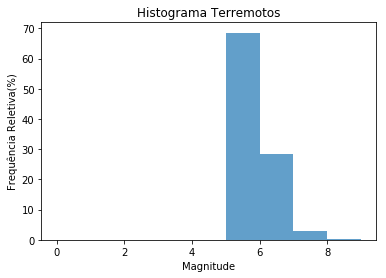

In [17]:
df.Magnitude.describe()

alcance = range(0,10,1)
cMagnitude = pd.cut(df.Magnitude, bins=alcance)
cMagnitude.value_counts(sort=False, normalize=True)*100

graficohist = df.Magnitude.plot.hist(bins=alcance,weights=zeros_like(df.Magnitude)+1./df.Magnitude.size*100,title='Histograma Terremotos',alpha=0.7)
plt.xlabel('Magnitude')
plt.ylabel('Frequência Reletiva(%)')

Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

In [18]:
a, b = expon.fit(df.Magnitude)

Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

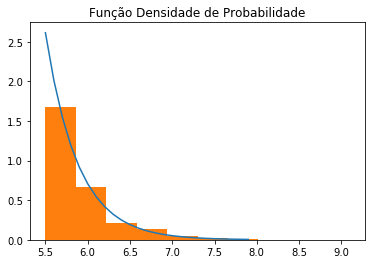

In [19]:
plt.plot(np.arange(5.5,8,0.1), expon.pdf(np.arange(5.5,8,0.1), loc=a, scale=b))
plt.hist(df.Magnitude, normed=True)
plt.title("Função Densidade de Probabilidade")

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [20]:
tabela_hemistype = pd.crosstab(df.Type, df.Hemisfério, normalize =True)*100
tabela_hemistype

Hemisfério,Norte,Sul
Type,,
Earthquake,44.712113,54.519050
Explosion,0.008543,0.008543
Nuclear Explosion,0.627883,0.119597
Rock Burst,0.000000,0.004271


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

In [22]:
terremoton = len(df.loc[(df["Hemisfério"] == "Norte")&(df["Type"] == "Earthquake")])
terremotototal= len(df["Hemisfério"])
prob = terremoton/terremotototal

print("A probabilidade de um terremoto no hemisfério norte é {0}%" .format(prob*100))

A probabilidade de um terremoto no hemisfério norte é 44.71211344609602%


Explique o seu raciocínio

A probabilidade de ocorrer um terremoto no hemisfério norte é igual a razão do numero de terremotos no hemisfério norte pelo numero total de terremotos.

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

In [23]:
def pConvert(tab):
  return (tab/float(tab[-1])*100).round(decimals=6)

probnorte=pd.crosstab(df.Hemisfério,df.Type,margins=True).apply(pConvert, axis=1)
probnorte

Type,Earthquake,Explosion,Nuclear Explosion,Rock Burst,All
Hemisfério,,,,,
Norte,98.596590,0.018838,1.384572,0.000000,100.0
Sul,99.757718,0.015631,0.218835,0.007816,100.0
All,99.231164,0.017085,0.747480,0.004271,100.0


Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é ...

In [26]:
probnorte['Nuclear Explosion'][0]

1.3845719999999999

## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

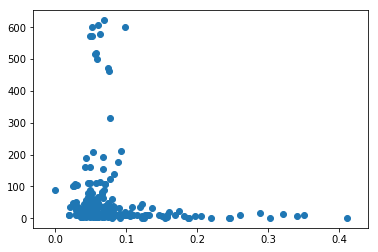

In [27]:
plt.scatter(df['Magnitude Error'],df['Depth'])
plt.show()

Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [30]:
dfdrop=df.dropna(subset=['Magnitude Error','Depth'])
print("A correlação entre Magnitude Error e Depth é",np.corrcoef(dfdrop['Magnitude Error'],dfdrop['Depth'])[0,1])



A correlação entre Magnitude Error e Depth é -0.0769184389234


Explique o que significa o valor da correlação calculada acima? 

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

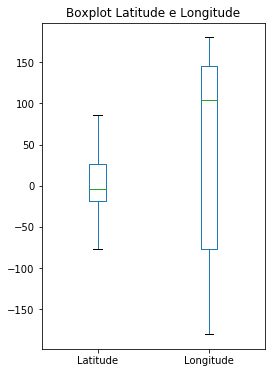

In [33]:
bloc = df.loc[:,["Latitude","Longitude"]]
bloc.describe()
bloc.plot(kind='box', figsize=(4,6), title="Boxplot Latitude e Longitude")

## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


In [34]:
probab=pd.crosstab([df.Hemisfério,df['Magnitude Type']],df.Type,normalize=True)
probab

Type                       Earthquake  Explosion  Nuclear Explosion  \
Hemisfério Magnitude Type                                             
Norte      MB                0.066086   0.000085           0.005767   
           MD                0.000256   0.000000           0.000000   
           MH                0.000214   0.000000           0.000000   
           ML                0.002777   0.000000           0.000513   
           MS                0.032722   0.000000           0.000000   
           MW                0.157375   0.000000           0.000000   
           MWB               0.047503   0.000000           0.000000   
           MWC               0.102055   0.000000           0.000000   
           MWR               0.000513   0.000000           0.000000   
           MWW               0.037550   0.000000           0.000000   
Sul        MB                0.087445   0.000085           0.001196   
           MS                0.039985   0.000000           0.000000   
           MW                0.172498   0.000000           0.000000   
           MWB               0.057499   0.000000           0.000000   
           MWC               0.140074   0.000000           0.000000   
           MWR               0.000598   0.000000           0.000000   
           MWW               0.047161   0.000000           0.000000   

Type                       Rock Burst  
Hemisfério Magnitude Type              
Norte      MB                0.000000  
           MD                0.000000  
           MH                0.000000  
           ML                0.000000  
           MS                0.000000  
           MW                0.000000  
           MWB               0.000000  
           MWC               0.000000  
           MWR               0.000000  
           MWW               0.000000  
Sul        MB                0.000000  
           MS                0.000000  
           MW                0.000000  
           MWB               0.000000  
           MWC               0.000043  
           MWR               0.000000  
           MWW               0.000000

A probabilidade maior é que tenha sido no norte